In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


# LINCS Datasets Overview

*Denis Torre*, October 13<sup>th</sup> 2017
### Summary
This notebook contains an initial overview of the datasets indexed by LDP and the number of technologies, cell lines and small molecules used to generate such data.

### 1. Dataset Metadata Acquisition
First, dataset metadata is acquired from the LINCS Data Portal API (http://lincsportal.ccs.miami.edu/dcic/api/fetchdata?searchTerm=*&limit=2000) and converted to a table format.

Every row of the table contains information regarding a specific dataset.

A subset of such data is shown below (full results available [here](https://raw.githubusercontent.com/denis-torre/lincs-dataset-browser/master/notebooks/lincs_data.tsv)):

In [2]:
import json, urllib2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from clustergrammer_widget import *
%matplotlib inline

In [3]:
# Read data
lincs_dataset_dataframe = pd.DataFrame(json.loads(unicode(urllib2.urlopen('http://lincsportal.ccs.miami.edu/dcic/api/fetchdata?searchTerm=*&limit=2000').read(), errors='ignore'))['results']['documents']).set_index('datasetid')

In [4]:
lincs_dataset_dataframe[['datasetgroup', 'datasetname', 'description', 'ldplink', 'technologies', 'smallmolecule', 'cellline']].dropna().head()

,datasetgroup,datasetname,description,ldplink,technologies,smallmolecule,cellline
datasetid,,,,,,,
LDS-1002,LDG-1001,Moerke 2 Color Apoptosis,-,http://lincsportal.ccs.miami.edu/datasets/#/vi...,Fluorescence imaging,"[GW843682X, Tozasertib, BI-2536, Paclitaxel, S...","[COLO-800, IST-MEL1, PC-9, NCI-H1648, IA-LM]"
LDS-1004,LDG-1003,Tang Mitosis/Apoptosis ver. II,-,http://lincsportal.ccs.miami.edu/datasets/#/vi...,Fluorescence imaging,"[Tozasertib, BI-2536, GSK-1070916, Aurora a in...","[PL4, SW620, WiDr, PE/CA-PJ15, A375.S2, COLO-6..."
LDS-1003,LDG-1002,Moerke 3 Color Apoptosis,-,http://lincsportal.ccs.miami.edu/datasets/#/vi...,Fluorescence imaging,"[GW843682X, Tozasertib, BI-2536, Paclitaxel, S...","[HUTU-80, SK-LMS-1, KYSE-140, KYSE-180, NCI-H8..."
LDS-1005,LDG-1004,Tang Proliferation/Mitosis,-,http://lincsportal.ccs.miami.edu/datasets/#/vi...,Fluorescence imaging,"[GW843682X, Tozasertib, BI-2536, Paclitaxel, S...","[HUTU-80, COLO-800, IST-MEL1, SK-LMS-1, SNB75,..."
LDS-1106,LDG-1103,Metrics other than potency reveal systematic v...,-,http://lincsportal.ccs.miami.edu/datasets/#/vi...,Fluorescence imaging,"[GSK-461364, Tozasertib, Imatinib, PD-173074, ...","[BT-474, BT-483, BT-549, HCC1419, MDA-MB-134-V..."


In [5]:
technology_count_dataframe = lincs_dataset_dataframe['technologies'].reset_index().drop_duplicates().groupby('technologies').size().rename('count').sort_values(ascending=False).to_frame().reset_index()

### 2. Overview of Technologies
Overview of the most utilized technologies, sorted by number of datasets generated.

In [6]:
sns.set_context("talk")

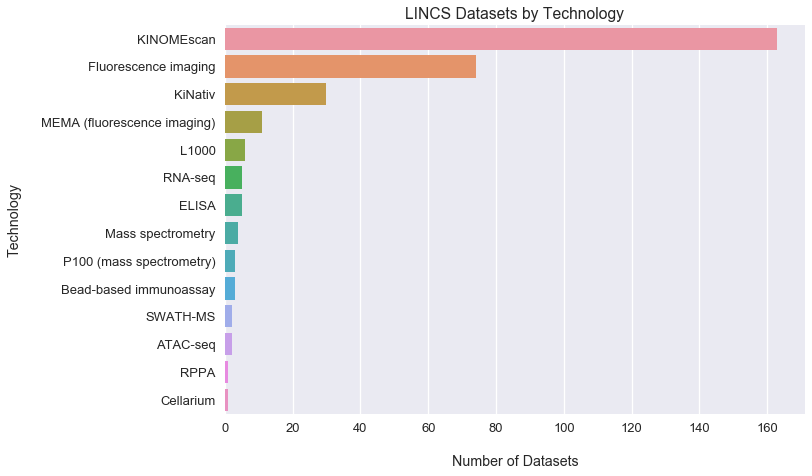

In [7]:
g = sns.barplot(x="count", y="technologies", data=technology_count_dataframe)
g.set(xlabel='\nNumber of Datasets', ylabel='Technology\n')
plt.title('LINCS Datasets by Technology')
plt.show()

In [8]:
cell_lines = [y for x in lincs_dataset_dataframe['cellline'] if not isinstance(x, float) for y in x]
cell_line_count_dataframe = pd.Series(Counter(cell_lines)).sort_values(ascending=False).rename('count').to_frame().reset_index()

### 3. Overview of Cell Lines
##### Top Cell Lines
Overview of the most frequently profiled cell lines, sorted by number of available datasets.

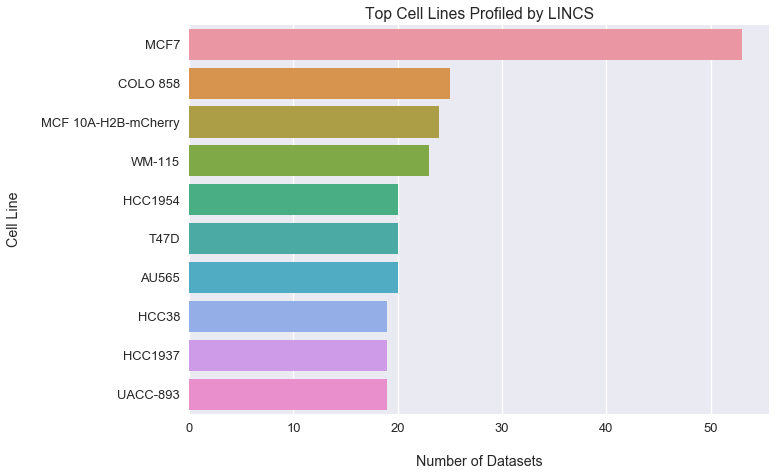

In [9]:
g = sns.barplot(x="count", y="index", data=cell_line_count_dataframe.iloc[:10])
g.set(xlabel='\nNumber of Datasets', ylabel='Cell Line\n')
plt.title('Top Cell Lines Profiled by LINCS')
plt.show()

##### Distribution of Datasets
Histogram of the number of available datasets for cell lines.  Most cell lines have been profiled in 10 different datasets, while only one (MCF7) has been profiled in over 50.

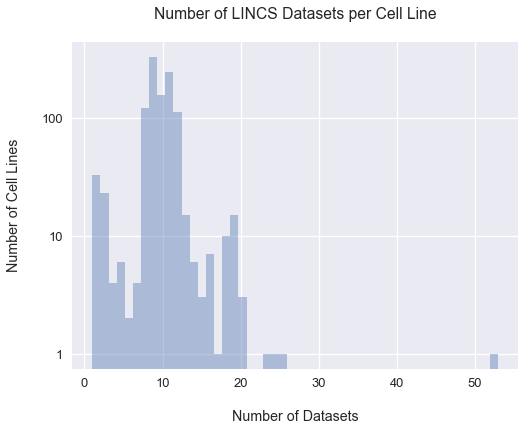

In [10]:
ticks = [10**x for x in range(3)]
fig, ax = plt.subplots(figsize = [8,6])
g = sns.distplot(cell_line_count_dataframe["count"], kde=False)
g.set(xlabel='\nNumber of Datasets', ylabel='Number of Cell Lines\n')
g.set_yscale('log')
g.set_yticks(ticks)
g.set_yticklabels(ticks)
plt.title('Number of LINCS Datasets per Cell Line\n')
plt.show()

### 4. Overview of Small Molecules
##### Top Small Molecules
Overview of the most frequently utilized small molecules, sorted by number of available datasets.

In [11]:
small_molecules = [y for x in lincs_dataset_dataframe['smallmolecule'] if not isinstance(x, float) for y in x]
small_molecule_count_dataframe = pd.Series(Counter(small_molecules)).sort_values(ascending=False).rename('count').to_frame().reset_index()

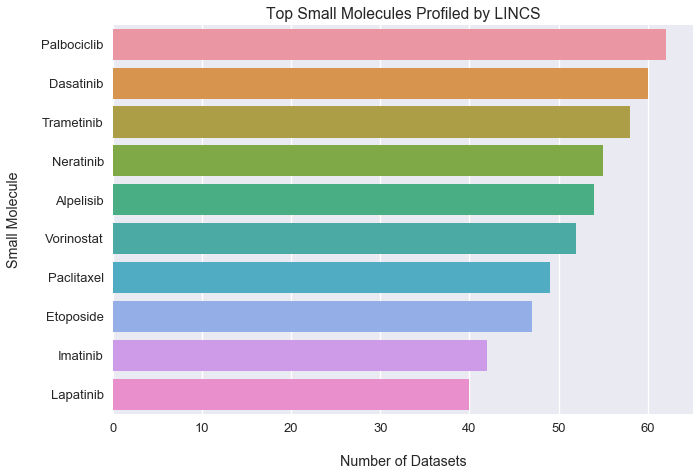

In [12]:
g = sns.barplot(x="count", y="index", data=small_molecule_count_dataframe.iloc[:10])
g.set(xlabel='\nNumber of Datasets', ylabel='Small Molecule\n')
plt.title('Top Small Molecules Profiled by LINCS')
plt.show()

##### Distribution of Datasets
Histogram of the number of available datasets for small molecules.  Most small molecules have been profiled in a single dataset, while few (e.g. Palbociclib, Dasatinib, Trametinib) has been profiled in over 50.

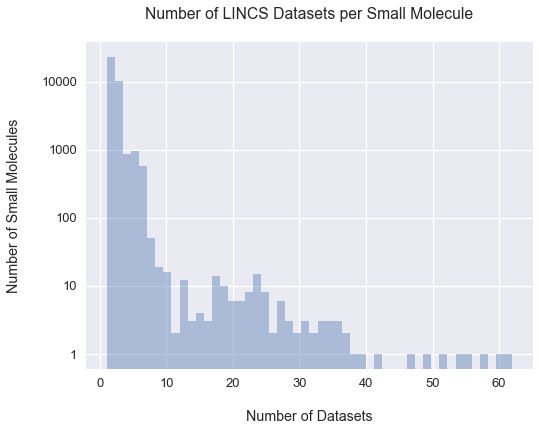

In [13]:
ticks = [10**x for x in range(5)]
fig, ax = plt.subplots(figsize = [8,6])
g = sns.distplot(small_molecule_count_dataframe["count"], kde=False)
g.set(xlabel='\nNumber of Datasets', ylabel='Number of Small Molecules\n')
g.set_yscale('log')
g.set_yticks(ticks)
g.set_yticklabels(ticks)
plt.title('Number of LINCS Datasets per Small Molecule\n')
plt.show()

In [14]:
cell_line_dataframe = pd.DataFrame([{'datasetid': index, 'cellline': cellline} for index, celllines in lincs_dataset_dataframe['cellline'].dropna().iteritems() for cellline in celllines])
small_molecule_dataframe = pd.DataFrame([{'datasetid': index, 'smallmolecule': smallmolecule} for index, smallmolecules in lincs_dataset_dataframe['smallmolecule'].dropna().iteritems() for smallmolecule in smallmolecules])
technology_dataframe = lincs_dataset_dataframe['technologies'].dropna().reset_index()
merged_dataframe = reduce(lambda x, y: pd.merge(x, y, on = 'datasetid'), [cell_line_dataframe, small_molecule_dataframe, technology_dataframe]).drop_duplicates()
# print merged_dataframe.shape
# merged_dataframe.head()

In [15]:
cols = ['cellline', 'smallmolecule', 'technologies']
getcols = lambda x: [col for col in cols if col != x]
counts = {x: pd.pivot_table(merged_dataframe.drop(x, axis=1).drop_duplicates().groupby(getcols(x)).size().rename('count').reset_index(), index=getcols(x)[0], columns=getcols(x)[1], values='count').fillna(0) for x in cols}

In [16]:
merged_counts = merged_dataframe.drop('datasetid', axis=1).drop_duplicates().groupby(['cellline', 'smallmolecule']).size().sort_values(ascending=False).rename('count').reset_index().rename(columns={'cellline': 'Cell Line', 'smallmolecule': 'Small Molecule', 'count': 'Technologies'})
cast_merged_counts = pd.pivot_table(merged_counts, index='Cell Line', columns='Small Molecule', values='Technologies').fillna(0)
# merged_counts.head()

### 5. Cell line - Small molecule pairs
Overview of the most profiled pairs of cell lines and small molecules.  Heatmap values show the number of different technologies in which the cell line-small molecule pair has been analyzed with.

In [17]:
top_cell_lines = cast_merged_counts.apply(np.sum, 1).sort_values(ascending=False).index
top_small_molecules = cast_merged_counts.apply(np.sum, 0).sort_values(ascending=False).index

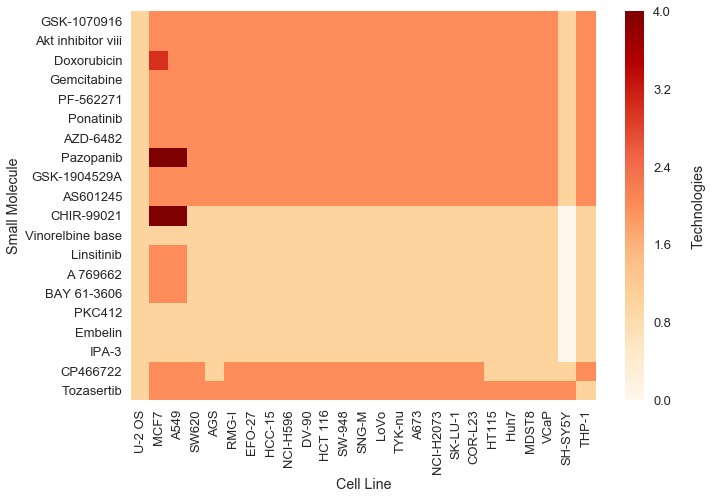

In [18]:
sns.heatmap(cast_merged_counts.loc[top_cell_lines[:25], top_small_molecules[:20]].T, cmap="OrRd", cbar_kws={'label': '\nTechnologies'});

### 6. Cell line - Technology Pairs
Overview of the most profiled pairs of cell lines and technologies.  Heatmap values show the number of different datasets in which the cell line-technology pair has been analyzed with.  (Fluorescence imaging not shown, as it has >15 datasets for each drug).

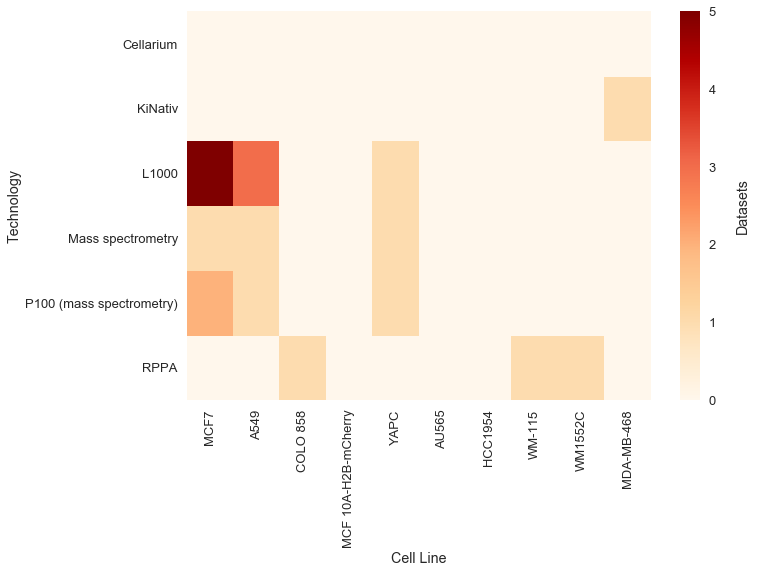

In [19]:
counts['smallmolecule'].index.name = 'Cell Line'
counts['smallmolecule'].columns.name = 'Technology'
top_cell_lines = counts['smallmolecule'].apply(np.sum, 1).sort_values(ascending=False).index[:10]
sns.heatmap(counts['smallmolecule'].loc[top_cell_lines].T.drop('Fluorescence imaging'), cmap="OrRd", cbar_kws={'label': '\nDatasets'});

### 7. Small molecule - Technology Pairs
Overview of the most profiled pairs of small molecules and technologies.  Heatmap values show the number of different datasets in which the small molecule-technology pair has been analyzed with.  (Fluorescence imaging not shown, as it has >15 datasets for each drug).

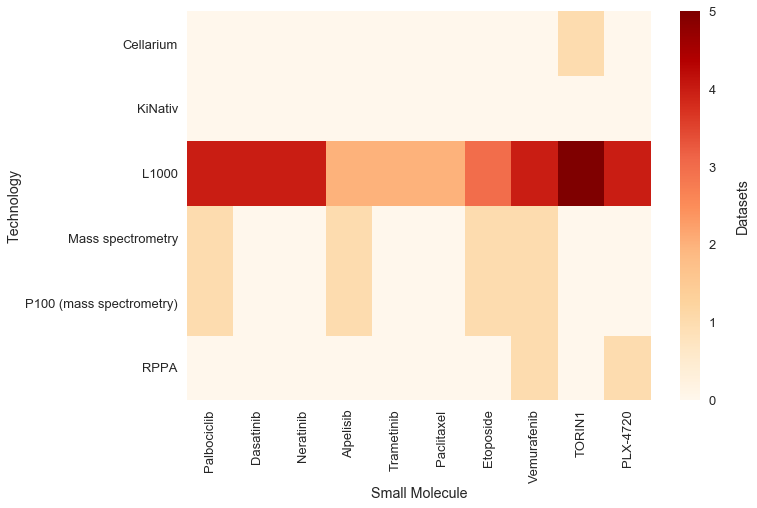

In [20]:
counts['cellline'].index.name = 'Small Molecule'
counts['cellline'].columns.name = 'Technology'
top_small_molecules = counts['cellline'].apply(np.sum, 1).sort_values(ascending=False).index[:10]
sns.heatmap(counts['cellline'].loc[top_small_molecules].T.drop('Fluorescence imaging'), cmap="OrRd", cbar_kws={'label': '\nDatasets'});

In [21]:
# top_cell_lines = counts['technologies'].apply(np.sum, 1).sort_values(ascending=False).index[:10]
# sns.heatmap(counts['technologies'].loc[top_cell_lines].T, cmap="PuBu")

In [22]:
# ticks = [0, 5, 10, 20, 30, 35]
# fig, ax = plt.subplots(figsize = [12,6])
# g = sns.heatmap(np.log10(counts['cellline'].T+1))
# cbar = g.collections[0].colorbar
# cbar.set_ticks([np.log10(x) if x > 0 else 0 for x in ticks])
# cbar.set_ticklabels(ticks)
# plt.show()

In [23]:
# top = {x: counts['technologies'].apply(np.sum, x).sort_values(ascending=False).index.tolist()[:100] for x in [0,1]}

In [24]:
# fig, ax = plt.subplots(figsize = [12,9])
# sns.heatmap(counts['technologies'].loc[top[1], top[0]].T)
# plt.show()